# Part 1 - Plyaing with Graphlab and Tutorial

In [1]:
# Import everything we need
import graphlab as gl

In [ ]:
# Load data from tutorial
vertices = gl.SFrame.read_csv('http://s3.amazonaws.com/dato-datasets/bond/bond_vertices.csv')
edges = gl.SFrame.read_csv('http://s3.amazonaws.com/dato-datasets/bond/bond_edges.csv')

[INFO] This trial license of GraphLab Create is assigned to james.quacinella@gmail.com and will expire on July 21, 2015. Please contact trial@dato.com for licensing options or to request a free non-commercial license for personal or academic use.

[INFO] Start server at: ipc:///tmp/graphlab_server-8817 - Server binary: /home/james/Development/Masters/IndependentStudy/graphlab-env/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1434950760.log


In [1]:
# Show the nodes in this graph
vertices

NameError: name 'vertices' is not defined

In [5]:
# Show how the nodes connect to one another
edges

src,dst,relation
Wai Lin,James Bond,friend
M,James Bond,worksfor
Inga Bergstorm,James Bond,friend
Elliot Carver,James Bond,killed_by
Gotz Otto,James Bond,killed_by
James Bond,M,managed_by
Q,M,managed_by
Moneypenny,M,managed_by
Q,Moneypenny,colleague
M,Moneypenny,worksfor


In [6]:
# Create empty graph
g = gl.SGraph()

In [7]:
# Create graph using our node list and edges between them
g = g.add_vertices(vertices=vertices, vid_field='name')
g = g.add_edges(edges=edges, src_field='src', dst_field='dst')

In [8]:
# Show all the vertices
g.get_vertices()

__id,gender,license_to_kill,villian
Moneypenny,F,1,0
Inga Bergstorm,F,0,0
Henry Gupta,M,0,1
Paris Carver,F,0,1
Q,M,1,0
Wai Lin,F,1,0
M,M,1,0
James Bond,M,1,0
Elliot Carver,M,0,1
Gotz Otto,M,0,1


In [9]:
# Show all the edges in dataframe
g.get_edges().to_dataframe()

,__src_id,__dst_id,relation
0,Moneypenny,M,managed_by
1,Inga Bergstorm,James Bond,friend
2,Moneypenny,Q,colleague
3,Henry Gupta,Elliot Carver,killed_by
4,Q,Moneypenny,colleague
5,M,Moneypenny,worksfor
6,James Bond,Inga Bergstorm,friend
7,James Bond,M,managed_by
8,Q,M,managed_by
9,Wai Lin,James Bond,friend


In [10]:
# Get all the "friend" edges
g.get_edges(fields={'relation': 'friend'})

__src_id,__dst_id,relation
Inga Bergstorm,James Bond,friend
James Bond,Inga Bergstorm,friend
Wai Lin,James Bond,friend
James Bond,Wai Lin,friend


In [11]:
pr = gl.pagerank.create(g)

PROGRESS: Counting out degree

PROGRESS: Done counting out degree

PROGRESS: +-----------+-----------------------+

PROGRESS: | Iteration | L1 change in pagerank |

PROGRESS: +-----------+-----------------------+

PROGRESS: | 1         | 6.65833               |

PROGRESS: | 2         | 4.65611               |

PROGRESS: | 3         | 3.46298               |

PROGRESS: | 4         | 2.55686               |

PROGRESS: | 5         | 1.95422               |

PROGRESS: | 6         | 1.42139               |

PROGRESS: | 7         | 1.10464               |

PROGRESS: | 8         | 0.806704              |

PROGRESS: | 9         | 0.620914              |

PROGRESS: | 10        | 0.465388              |

PROGRESS: | 11        | 0.364898              |

PROGRESS: | 12        | 0.271257              |

PROGRESS: | 13        | 0.212255              |

PROGRESS: | 14        | 0.158661              |

PROGRESS: | 15        | 0.124071              |

PROGRESS: | 16        | 0.0935911             |

PROGRESS: | 17        | 0.0727674             |

PROGRESS: | 18        | 0.0471245             |

PROGRESS: | 19        | 0.0427744             |

PROGRESS: | 20        | 0.0325555             |

PROGRESS: +-----------+-----------------------+

In [12]:
pr.get('pagerank').topk(column_name='pagerank')

__id,pagerank,delta
James Bond,2.52743578524,0.0132914517076
M,1.87718696576,0.00666194771763
Moneypenny,1.18363921275,0.00143637385736
Q,1.18363921275,0.00143637385736
Inga Bergstorm,0.869872717136,0.00477951418076
Wai Lin,0.869872717136,0.00477951418076
Elliot Carver,0.634064732205,0.000113553313724
Henry Gupta,0.284762885673,1.89255522874e-05
Paris Carver,0.284762885673,1.89255522874e-05
Gotz Otto,0.284762885673,1.89255522874e-05


# Part 2 - Small Data Set (Kite Network)

## Graphlab Create

In [ ]:
# Load Data
kite_vertices = gl.SFrame.read_csv('Week1/kite_vertices.csv')
kite_edges = gl.SFrame.read_csv('Week1/kite_edges.csv')

[INFO] This trial license of GraphLab Create is assigned to james.quacinella@gmail.com and will expire on July 21, 2015. Please contact trial@dato.com for licensing options or to request a free non-commercial license for personal or academic use.

[INFO] Start server at: ipc:///tmp/graphlab_server-8742 - Server binary: /home/james/Development/Masters/IndependentStudy/graphlab-env/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1434950722.log


In [1]:
# Create graph
g_kite = gl.SGraph()
g_kite = g_kite.add_vertices(vertices=kite_vertices, vid_field='name')
g_kite = g_kite.add_edges(edges=kite_edges, src_field='src', dst_field='dst')
g_kite.get_edges().to_dataframe()

NameError: name 'gl' is not defined

In [4]:
g.get_vertices()

__id
Beverly
Fernando
Ed
Jane
Diane
Garth
Andre
Carol
Ike
Heather


In [7]:
# Visualize graph?
gl.canvas.set_target('ipynb')
g.show(vlabel="id")

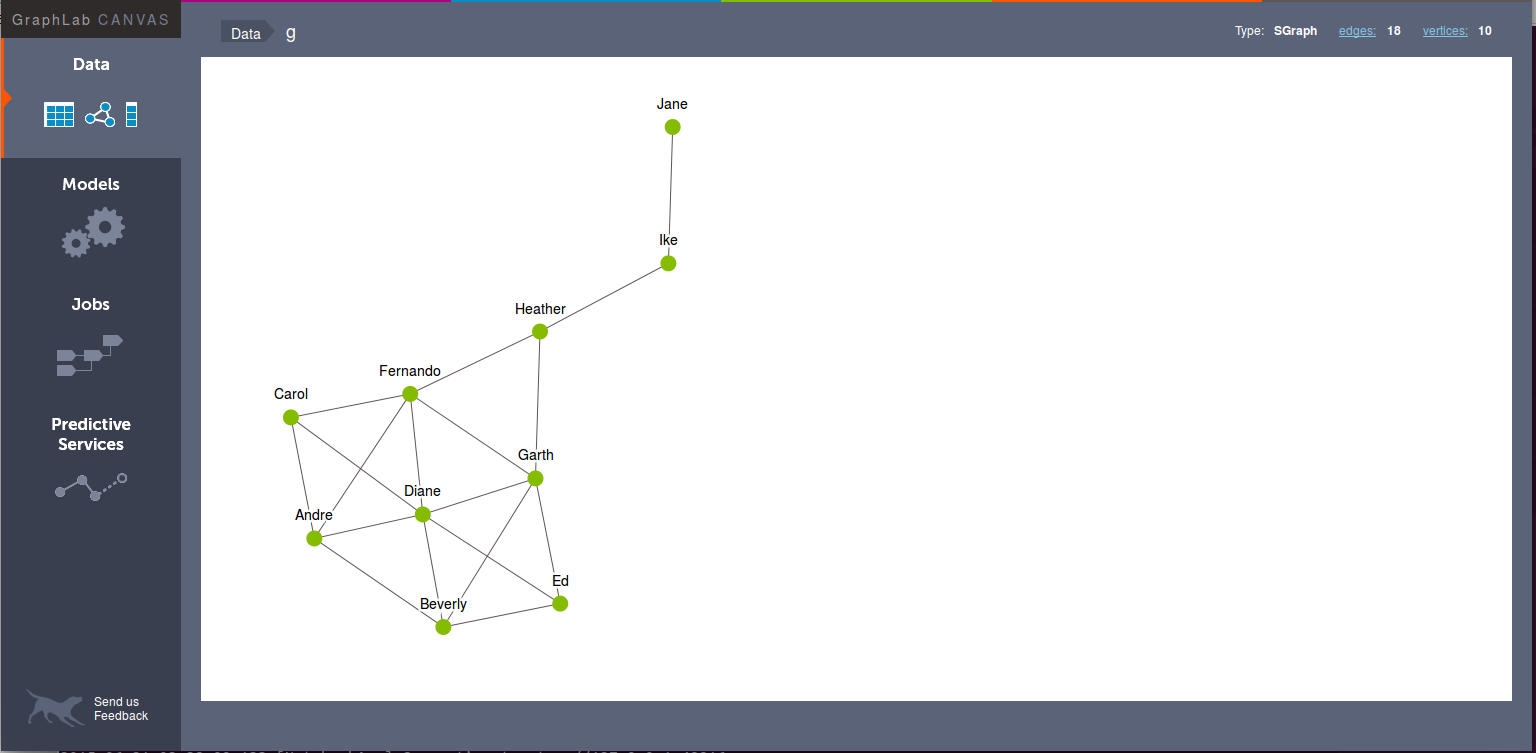

In [8]:
from IPython.display import Image
Image(filename='Week1/kite-graphlab.png', width=1000) 

In [ ]:
# Measure Centrality 
pr_kite = gl.pagerank.create(g)

## iGraph

In [13]:
# Load data

# Visualize

## Gephi

In [14]:
# Show screenshot

# Part 3 - Large Data Set

Arxiv HEP-PH (high energy physics phenomenology ) citation graph is from the e-print arXiv and covers all the citations within a dataset of 34,546 papers with 421,578 edges. If a paper i cites paper j, the graph contains a directed edge from i to j. If a paper cites, or is cited by, a paper outside the dataset, the graph does not contain any information about this.

The data covers papers in the period from January 1993 to April 2003 (124 months). It begins within a few months of the inception of the arXiv, and thus represents essentially the complete history of its HEP-PH section.

Source: https://snap.stanford.edu/data/cit-HepPh.html

## GraphLab Create

## iGraph

## Gephi